<a href="https://colab.research.google.com/github/ecandes/stat318/blob/master/Ising_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sampling from the Ising model via Metropolis 

We wish to sample from the Ising model 

$$
\pi(x) = \frac{1}{Z} \exp(-\beta E(x)) \qquad E(x) = -\frac{1}{2} \sum_{v \sim v'} x_v x_{v'} 
$$

defined on a graph $G$, where $v \sim v'$ means that the nodes are adjacent. 
We consider the Metropolis algorithm to do this: for $t = 1, \ldots$

- select a site uniformly at random and flip the sign
- accept the move with probability 

$$
\min(\pi(y)/\pi(x), 1) = e^{-\beta(E(y) - E(x))} \wedge 1 
$$ 

There is a convenient expression for the right-hand side:

$$
 \exp(-\beta(E(y) - E(x))) = \exp(-\beta x_v g_v) \qquad g_v = \sum_{v': v' \sim v} x_v. 
$$ 


In [0]:
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

plt.rcParams["figure.figsize"] = (4,4)

We work with the square lattice for our graph $G$ represented below. 

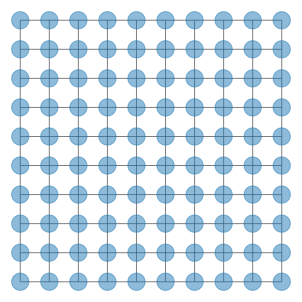

In [7]:
plt.rcParams["figure.figsize"] = (4,4)
L = 10
G = nx.grid_2d_graph(L,L)
nx.draw(G,pos=dict(zip(G.nodes.keys(),G.nodes.keys())),nodesize=150,alpha=0.5)


In [0]:
class IsingModel:

    def __init__(self, G, X=None):
        self.G = G                   # Underlying graph
        self.n = G.number_of_nodes()  # Number of nodes
        self.nodes = list(G.nodes.keys())  # List of nodes
        if X is None:
            X = np.ones(self.n).astype(int)
        # Configuration : 0/1 = free/occupied site
        self.X = dict(zip(self.nodes, X))
        # Useful for plotting
        self.pos = dict(zip(self.nodes, self.nodes))

    def sumNeighbors(self, v):
        return np.sum(np.array([self.X[w] for w in self.G.neighbors(v)]))

    def sum(self):
        return np.array(list(self.X.values())).sum()

    def update(self, v, bit):
        self.X[v] = bit

    def drawConfig(self, node_size=150):
        up = [key for key in self.X.keys() if self.X[key] == 1]
        down = [key for key in self.X.keys() if self.X[key] == -1]
        options = {"node_size": 200, "alpha": 1}
        nx.draw(G, self.pos, nodelist=up,   node_color="b", **options)
        nx.draw(G, self.pos, nodelist=down, node_color="r", **options)
        plt.title('Ising model configuration')
        plt.show()

    def sample(self, T, beta =1, X0=None):
        if not X0 is None:
            self.X = X0
        sumlist = [self.sum()]
        # Sample vertices (numpy knows how to sample from 1D arrays only)
        Vlist = np.random.choice(self.n, T, replace=True)
        Vlist = [self.nodes[v] for v in Vlist]
        # Sample uniform variables
        Ulist = np.random.rand(T)

        for [v, u] in zip(Vlist, Ulist):
            val = self.X[v]
            if u < min(np.exp(-beta*val*self.sumNeighbors(v)),1):
              self.update(v,-val)
         
            sumlist.append(sumlist[-1] - val + self.X[v])
        return sumlist


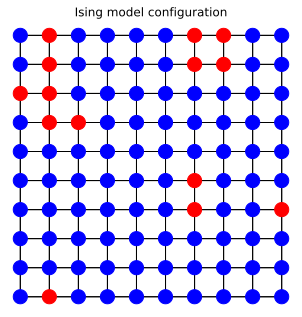

Magnetization at T = 10000: 72


In [9]:
beta = 1
plt.rcParams["figure.figsize"] = (4,4)
chain = IsingModel(G)
T = 10000
sumlist = chain.sample(T,beta)
chain.drawConfig()
print('Magnetization at T = {}: {}'.format(T,sumlist[-1]))

We are interested in magentization $M$ at time defined as 

$$
M =  f(x) = \sum_v x_v
$$

We start from the current configuration, run the chain $T$ steps and compute 

$$
\frac{1}{T} \sum_{t = 1}^T f(X_t).
$$


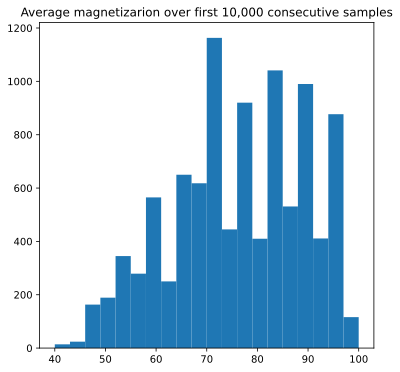

In [10]:
plt.rcParams["figure.figsize"] = (6,6)
plt.hist(sumlist,bins=20)
plt.title('Average magnetization over first 10,000 consecutive samples')
plt.show()

Average magnetization: -21.45


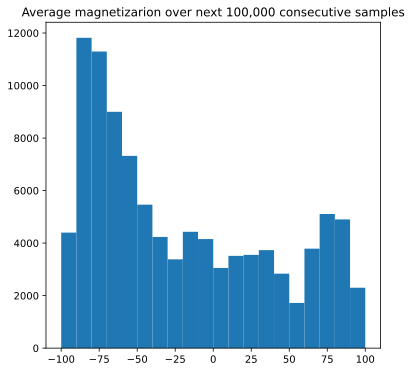

CPU times: user 1.35 s, sys: 15.1 ms, total: 1.37 s
Wall time: 1.38 s


In [11]:
%%time
T = 100000
sumlist = chain.sample(T,beta)
print('Average magnetization: {:.2f}'.format(np.mean(np.array([sumlist]))))
plt.hist(sumlist,bins=20)
plt.title('Average magnetization over next 100,000 consecutive samples')
plt.show()

We repeat this 10 times.

In [12]:
%%time
for b in range(10):
    T = 100000
    sumlist = chain.sample(T,beta)
    print('Average magnetization: {:.2f}'.format(np.mean(np.array([sumlist]))))

Average magnetization: -24.60
Average magnetization: -56.75
Average magnetization: -34.72
Average magnetization: -1.64
Average magnetization: 16.10
Average magnetization: -70.10
Average magnetization: 14.50
Average magnetization: -10.43
Average magnetization: -30.46
Average magnetization: -18.70
CPU times: user 11.7 s, sys: 7.12 ms, total: 11.7 s
Wall time: 11.8 s


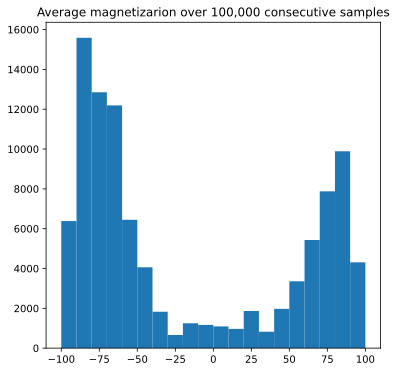

In [13]:
plt.rcParams["figure.figsize"] = (6,6)
plt.hist(sumlist,bins=20)
plt.title('Average magnetizarion over 100,000 consecutive samples')
plt.show()

### Colder temperature

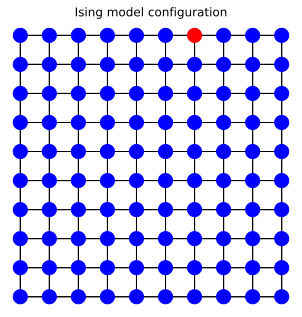

Magnetization at T = 10000: 98


In [21]:
beta = 2

plt.rcParams["figure.figsize"] = (4,4)
chain = IsingModel(G)
T = 10000
sumlist = chain.sample(T,beta)
chain.drawConfig()
print('Magnetization at T = {}: {}'.format(T,chain.sum()))


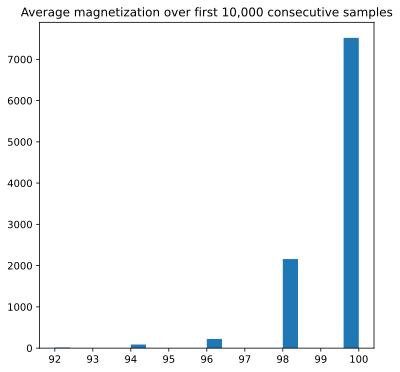

In [22]:
plt.rcParams["figure.figsize"] = (6,6)
plt.hist(sumlist,bins=20)
plt.title('Average magnetization over first 10,000 consecutive samples')
plt.show()

Average magnetization: 99.51


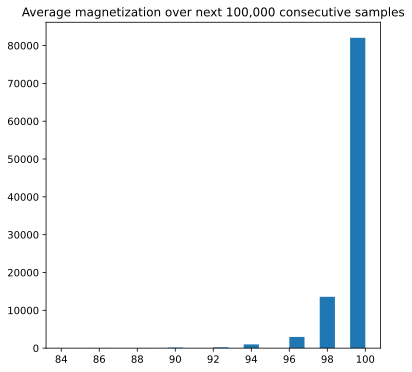

CPU times: user 1.36 s, sys: 6.7 ms, total: 1.37 s
Wall time: 1.38 s


In [23]:
%%time
T = 100000
sumlist = chain.sample(T,beta)
print('Average magnetization: {:.2f}'.format(np.mean(np.array([sumlist]))))
plt.hist(sumlist,bins=20)
plt.title('Average magnetization over next 100,000 consecutive samples')
plt.show()

In [24]:
%%time
for b in range(10):
    T = 100000
    sumlist = chain.sample(T,beta)
    print('Average magnetization: {:.2f}'.format(np.mean(np.array([sumlist]))))

Average magnetization: 99.47
Average magnetization: 99.45
Average magnetization: 99.38
Average magnetization: 99.47
Average magnetization: 99.46
Average magnetization: 99.56
Average magnetization: 99.43
Average magnetization: 99.46
Average magnetization: 99.46
Average magnetization: 99.37
CPU times: user 11.5 s, sys: 16.3 ms, total: 11.5 s
Wall time: 11.5 s


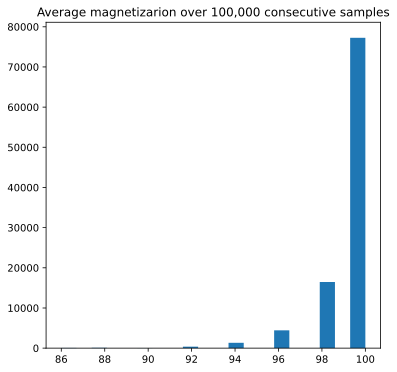

In [25]:
plt.rcParams["figure.figsize"] = (6,6)
plt.hist(sumlist,bins=20)
plt.title('Average magnetizarion over 100,000 consecutive samples')
plt.show()